In [82]:
#data set of IMBD shows data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
data=pd.read_csv(r"C:\Users\SHANTHI GURJAR\Downloads\imbd_top_shows_dataset.csv")
data

,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0903747,Breaking Bad,2008,2013.0,1,9.5,2315948,"Michelle MacLaren, Adam Bernstein, Vince Gilli...","Vince Gilligan, Peter Gould, George Mastras, S...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0903747""...","<a href=""https://www.imdb.com/title/tt0903747""..."
1,tt0185906,Band of Brothers,2001,2001.0,2,9.4,559679,"David Frankel, Mikael Salomon, Tom Hanks, Davi...","Stephen Ambrose, Erik Bork, E. Max Frye, Tom H...","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0185906""...","<a href=""https://www.imdb.com/title/tt0185906""..."
2,tt7366338,Chernobyl,2019,2019.0,3,9.3,943628,Johan Renck,Craig Mazin,"Drama, History, Thriller","<a href=""https://www.imdb.com/title/tt7366338""...","<a href=""https://www.imdb.com/title/tt7366338""..."
3,tt0795176,Planet Earth,2006,2006.0,4,9.4,227020,"Alastair Fothergill, Mark Linfield","David Attenborough, Vanessa Berlowitz, Alastai...","Documentary, Family","<a href=""https://www.imdb.com/title/tt0795176""...","<a href=""https://www.imdb.com/title/tt0795176""..."
4,tt5491994,Planet Earth II,2016,2016.0,5,9.4,166080,"Justin Anderson, Ed Charles, Fredi Devas, Chad...",Elizabeth White,Documentary,"<a href=""https://www.imdb.com/title/tt5491994""...","<a href=""https://www.imdb.com/title/tt5491994""..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,tt4176650,Ten Little Roosters,2014,NaN,4996,8.0,787,Josh Flanagan,Josh Flanagan,"Comedy, Crime, Mystery","<a href=""https://www.imdb.com/title/tt4176650""...","<a href=""https://www.imdb.com/title/tt4176650""..."
4996,tt26787804,Empati,2022,NaN,4997,8.9,786,Özcan Mavis,Egemen Alper Koca,Reality-TV,"<a href=""https://www.imdb.com/title/tt26787804...","<a href=""https://www.imdb.com/title/tt26787804..."
4997,tt6097360,Chris Stuckmann Hilariocity Reviews,2013,NaN,4998,8.6,786,"Chris Stuckmann, John Flickinger","Matthew Danczak, John Flickinger, Chris Stuckmann",Comedy,"<a href=""https://www.imdb.com/title/tt6097360""...","<a href=""https://www.imdb.com/title/tt6097360""..."
4998,tt0098910,Shining Time Station,1989,1993.0,4999,8.1,786,"Gregory Lehane, Wayne Moss, Matthew Diamond, S...","Britt Allcroft, Rick Siggelkow, Brian Edward O...","Comedy, Family, Fantasy","<a href=""https://www.imdb.com/title/tt0098910""...","<a href=""https://www.imdb.com/title/tt0098910""..."


In [84]:
data.head(10)

,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0903747,Breaking Bad,2008,2013.0,1,9.5,2315948,"Michelle MacLaren, Adam Bernstein, Vince Gilli...","Vince Gilligan, Peter Gould, George Mastras, S...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0903747""...","<a href=""https://www.imdb.com/title/tt0903747""..."
1,tt0185906,Band of Brothers,2001,2001.0,2,9.4,559679,"David Frankel, Mikael Salomon, Tom Hanks, Davi...","Stephen Ambrose, Erik Bork, E. Max Frye, Tom H...","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0185906""...","<a href=""https://www.imdb.com/title/tt0185906""..."
2,tt7366338,Chernobyl,2019,2019.0,3,9.3,943628,Johan Renck,Craig Mazin,"Drama, History, Thriller","<a href=""https://www.imdb.com/title/tt7366338""...","<a href=""https://www.imdb.com/title/tt7366338""..."
3,tt0795176,Planet Earth,2006,2006.0,4,9.4,227020,"Alastair Fothergill, Mark Linfield","David Attenborough, Vanessa Berlowitz, Alastai...","Documentary, Family","<a href=""https://www.imdb.com/title/tt0795176""...","<a href=""https://www.imdb.com/title/tt0795176""..."
4,tt5491994,Planet Earth II,2016,2016.0,5,9.4,166080,"Justin Anderson, Ed Charles, Fredi Devas, Chad...",Elizabeth White,Documentary,"<a href=""https://www.imdb.com/title/tt5491994""...","<a href=""https://www.imdb.com/title/tt5491994""..."
5,tt0944947,Game of Thrones,2011,2019.0,6,9.2,2422967,"David Nutter, Alan Taylor, Alex Graves, Miguel...","David Benioff, George R.R. Martin, D.B. Weiss,...","Action, Adventure, Drama","<a href=""https://www.imdb.com/title/tt0944947""...","<a href=""https://www.imdb.com/title/tt0944947""..."
6,tt0141842,The Sopranos,1999,2007.0,7,9.2,520990,"Timothy Van Patten, John Patterson, Allen Coul...","David Chase, Terence Winter, Mitchell Burgess,...","Crime, Drama","<a href=""https://www.imdb.com/title/tt0141842""...","<a href=""https://www.imdb.com/title/tt0141842""..."
7,tt0417299,Avatar: The Last Airbender,2005,2008.0,8,9.3,403878,"Giancarlo Volpe, Ethan Spaulding, Lauren MacMu...","Michael Dante DiMartino, Bryan Konietzko, Aaro...","Action, Adventure, Animation","<a href=""https://www.imdb.com/title/tt0417299""...","<a href=""https://www.imdb.com/title/tt0417299""..."
8,tt0306414,The Wire,2002,2008.0,9,9.3,401488,"Joe Chappelle, Ernest R. Dickerson, Clark John...","David Simon, Ed Burns, Joy Kecken, Rafael Álva...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0306414""...","<a href=""https://www.imdb.com/title/tt0306414""..."
9,tt1475582,Sherlock,2010,2017.0,10,9.1,1044993,"Paul McGuigan, Jeremy Lovering, Nick Hurran, C...","Mark Gatiss, Steven Moffat, Arthur Conan Doyle...","Crime, Drama, Mystery","<a href=""https://www.imdb.com/title/tt1475582""...","<a href=""https://www.imdb.com/title/tt1475582""..."


In [86]:
data.tail(10)

,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link
4990,tt22694250,Dance Life,2024,NaN,4991,8.3,794,Luke Cornish,"Jade Barnes, Luke Cornish",Documentary,"<a href=""https://www.imdb.com/title/tt22694250...","<a href=""https://www.imdb.com/title/tt22694250..."
4991,tt8037706,The Caterpillar Effect,2018,2018.0,4992,8.4,793,Vikas Thippani,"Koundinya Sista, Vikas Thippani","Drama, Mystery, Thriller","<a href=""https://www.imdb.com/title/tt8037706""...","<a href=""https://www.imdb.com/title/tt8037706""..."
4992,tt7216954,Under Pressure,2017,2022.0,4993,8.6,791,"Andrucha Waddington, Mini Kerti, Pedro Wadding...","Jorge Furtado, Renato Fagundes, Luiz Noronha, ...","Drama, Thriller","<a href=""https://www.imdb.com/title/tt7216954""...","<a href=""https://www.imdb.com/title/tt7216954""..."
4993,tt10110244,El Maestro,2019,2019.0,4994,8.7,788,Lassaad Oueslati,"Riadh Fehri, Imad Eddine Hakim, Lassaad Oueslati","Drama, Music","<a href=""https://www.imdb.com/title/tt10110244...","<a href=""https://www.imdb.com/title/tt10110244..."
4994,tt0227975,The Water Margin,1973,1974.0,4995,8.1,787,"Toshio Masuda, Yasuo Furuhata, Keiichi Ozawa, ...","Kaneo Ikegami, Ichirô Miyagawa, Hajime Takaiwa","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0227975""...","<a href=""https://www.imdb.com/title/tt0227975""..."
4995,tt4176650,Ten Little Roosters,2014,NaN,4996,8.0,787,Josh Flanagan,Josh Flanagan,"Comedy, Crime, Mystery","<a href=""https://www.imdb.com/title/tt4176650""...","<a href=""https://www.imdb.com/title/tt4176650""..."
4996,tt26787804,Empati,2022,NaN,4997,8.9,786,Özcan Mavis,Egemen Alper Koca,Reality-TV,"<a href=""https://www.imdb.com/title/tt26787804...","<a href=""https://www.imdb.com/title/tt26787804..."
4997,tt6097360,Chris Stuckmann Hilariocity Reviews,2013,NaN,4998,8.6,786,"Chris Stuckmann, John Flickinger","Matthew Danczak, John Flickinger, Chris Stuckmann",Comedy,"<a href=""https://www.imdb.com/title/tt6097360""...","<a href=""https://www.imdb.com/title/tt6097360""..."
4998,tt0098910,Shining Time Station,1989,1993.0,4999,8.1,786,"Gregory Lehane, Wayne Moss, Matthew Diamond, S...","Britt Allcroft, Rick Siggelkow, Brian Edward O...","Comedy, Family, Fantasy","<a href=""https://www.imdb.com/title/tt0098910""...","<a href=""https://www.imdb.com/title/tt0098910""..."
4999,tt0057753,The Great War,1964,1964.0,5000,8.9,784,-,"Correlli Barnett, Alistair Horne, Antony Jay, ...","Documentary, History, War","<a href=""https://www.imdb.com/title/tt0057753""...","<a href=""https://www.imdb.com/title/tt0057753""..."


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   endYear          4115 non-null   float64
 4   rank             5000 non-null   int64  
 5   averageRating    5000 non-null   float64
 6   numVotes         5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          5000 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [90]:
data.describe

<bound method NDFrame.describe of           tconst                         primaryTitle  startYear  endYear  \
0      tt0903747                         Breaking Bad       2008   2013.0   
1      tt0185906                     Band of Brothers       2001   2001.0   
2      tt7366338                            Chernobyl       2019   2019.0   
3      tt0795176                         Planet Earth       2006   2006.0   
4      tt5491994                      Planet Earth II       2016   2016.0   
...          ...                                  ...        ...      ...   
4995   tt4176650                  Ten Little Roosters       2014      NaN   
4996  tt26787804                               Empati       2022      NaN   
4997   tt6097360  Chris Stuckmann Hilariocity Reviews       2013      NaN   
4998   tt0098910                 Shining Time Station       1989   1993.0   
4999   tt0057753                        The Great War       1964   1964.0   

      rank  averageRating  numVotes  \
0 

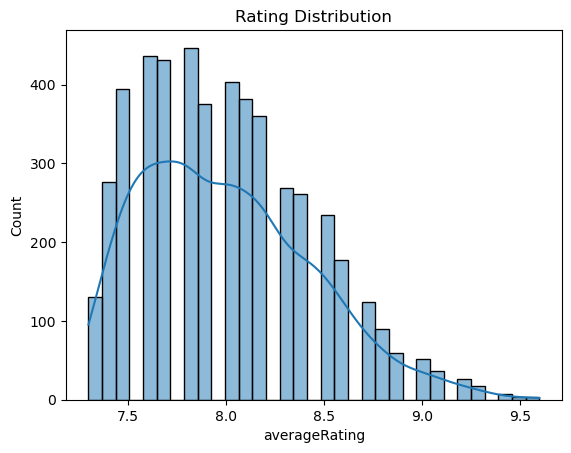

In [92]:
# Univariate Analysis: Numerical
sns.histplot(data['averageRating'], kde=True).set_title('Rating Distribution')
plt.show()


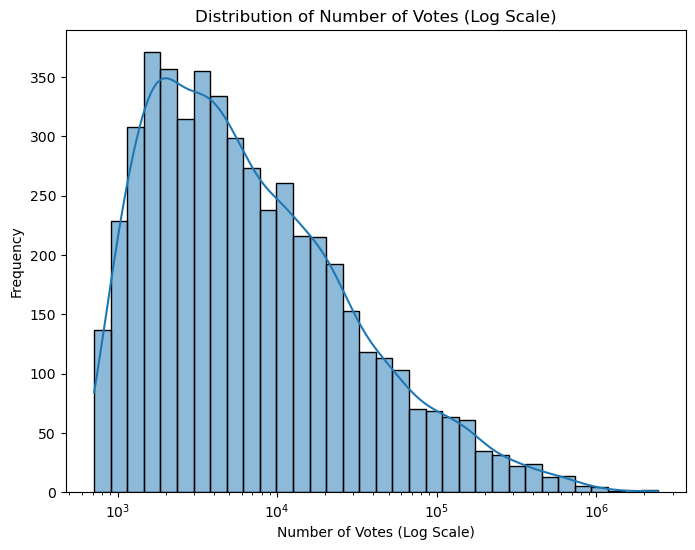

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(data['numVotes'], kde=True, log_scale=True)
plt.title('Distribution of Number of Votes (Log Scale)')
plt.xlabel('Number of Votes (Log Scale)')
plt.ylabel('Frequency')
plt.show()

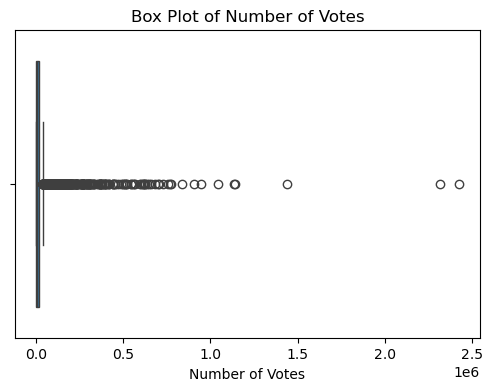

In [95]:
# Box Plot of 'num_votes'
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['numVotes'])
plt.title('Box Plot of Number of Votes')
plt.xlabel('Number of Votes')
plt.show()

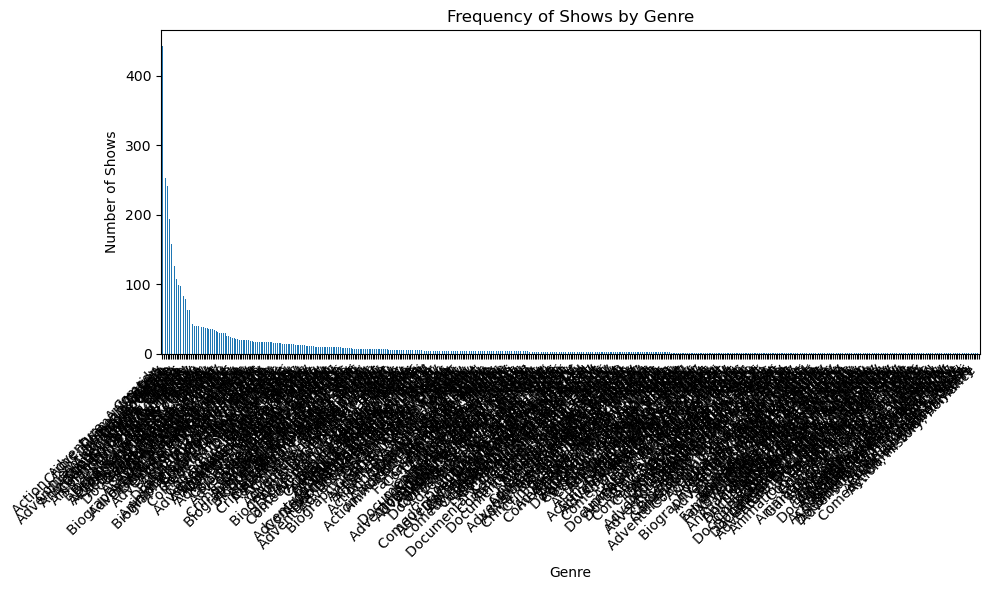

In [96]:
plt.figure(figsize=(10, 6))
data['genres'].value_counts().plot(kind='bar')
plt.title('Frequency of Shows by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

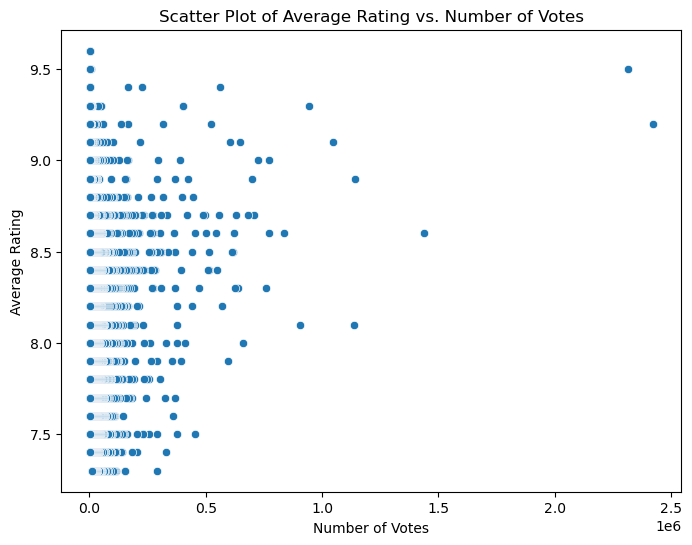

In [98]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='numVotes', y='averageRating', data=data)
plt.title('Scatter Plot of Average Rating vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

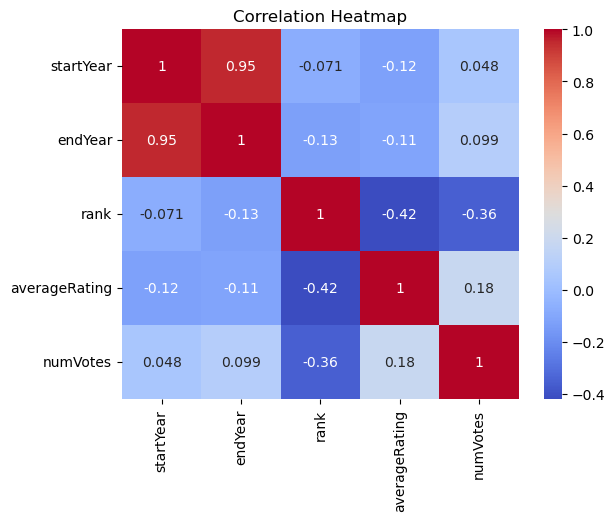

In [109]:
# Correlation Heatmap
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

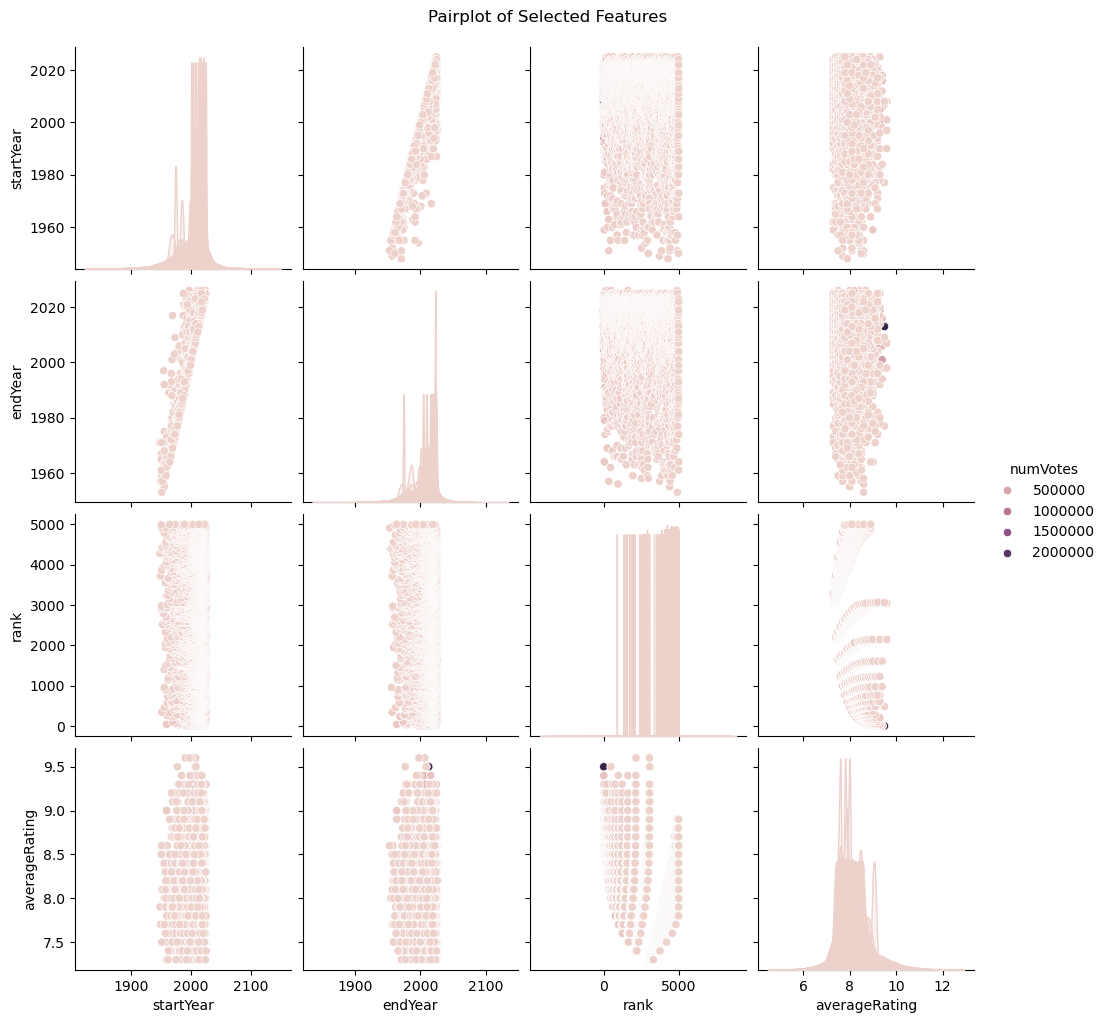

In [119]:
# Pairplot with Votes hue  Multivariate Analysis
selected_columns = ['startYear','endYear','rank','averageRating','numVotes']
sns.pairplot(data[selected_columns], hue='numVotes')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()